In [1]:
import os

import torch

from shap_e.diffusion.sample import sample_latents
from shap_e.diffusion.gaussian_diffusion import diffusion_from_config
from shap_e.models.download import load_model, load_config
from shap_e.util.notebooks import create_pan_cameras, decode_latent_images, gif_widget

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
# xm = load_model('transmitter', device=device)
model = load_model('text300M', device=device)
diffusion = diffusion_from_config(load_config('diffusion'))

/home/chaewon215/chbf/PatternSVG/temp/AI-System-Project/shap-e/shap_e/models/nn/checkpoint.py:31: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @custom_fwd
/home/chaewon215/chbf/PatternSVG/temp/AI-System-Project/shap-e/shap_e/models/nn/checkpoint.py:43: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
  @custom_bwd
/home/chaewon215/chbf/PatternSVG/temp/AI-System-Project/shap-e/shap_e/models/nn/checkpoint.py:61: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @custom_fwd
/home/chaewon215/chbf/PatternSVG/temp/AI-System-Project/shap-e/shap_e/models/nn/checkpoint.py:86: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
  @custom_

  0%|          | 0.00/1.26G [00:00<?, ?iB/s]

In [4]:
import webcolors
import random
def closest_color_name(hex_code):
    try:
        # 정확히 일치하는 이름이 있는 경우
        return webcolors.hex_to_name(hex_code)
    except ValueError:
        # 가장 가까운 색상 이름 찾기
        def closest_color(requested_rgb):
            min_distance = float('inf')
            closest_name = None
            for name in webcolors.names("css3"):
                r_c, g_c, b_c = webcolors.name_to_rgb(name)
                distance = (r_c - requested_rgb[0])**2 + (g_c - requested_rgb[1])**2 + (b_c - requested_rgb[2])**2
                if distance < min_distance:
                    min_distance = distance
                    closest_name = name
            return closest_name
        
        rgb = webcolors.hex_to_rgb(hex_code)
        return closest_color(rgb)

# 테스트 출력
print(closest_color_name('#123456'))


antique_dominant_colors = [
    '#180f0c',
    '#4c3226',
    '#93684a',
    '#baa27c',
    '#dedac8']


modern_dominant_colors = [
    '#918375',
    '#c8c9c7', 
    '#291a0f', 
    '#92877c', 
    '#bbb8b0' 
]

natural_dominant_colors = [
    '#382e1c',
    '#3b301e',
    '#c2af9e',
    '#a48c78',
    '#e8e5e1']

northern_european_dominant_colors = [
    '#efefef',
    '#afadab',
    '#cdcdcd',
    '#eaeaeb',
    '#7a6f67'
]

romantic_dominant_colors = [
    '#bcbab8',
    '#a29b93',
    '#e9e9e5',
    '#7a6460',
    '#3d211b']

korean_dominant_colors = [
    '#b6ae99',
    '#2c1f12',
    '#5f4931',
    '#d6d5cf',
    '#918264']


vintage_dominant_colors = [
    '#acaaa4',
    '#bfaf9c',
    '#b48560',
    '#984b1c',
    '#372922'
]

antique_closest_dominant_colors = [closest_color_name(color) for color in antique_dominant_colors]
antique_prompt = "Create an antique bronze clock." + " dominant colors are " + ", ".join(antique_closest_dominant_colors) + "."
print(antique_prompt)

modern_closest_dominant_colors = [closest_color_name(color) for color in modern_dominant_colors]
modern_prompt = "Create a modern glass table." + " dominant colors are " + ", ".join(modern_closest_dominant_colors) + "."
print(modern_prompt)

natural_closest_dominant_colors = [closest_color_name(color) for color in natural_dominant_colors]
natural_prompt = "Create a natural wooden table." + " dominant colors are " + ", ".join(natural_closest_dominant_colors) + "."
print(natural_prompt)

northern_european_closest_dominant_colors = [closest_color_name(color) for color in northern_european_dominant_colors]
northern_european_prompt = "Create a northern european metallic lamp." + " dominant colors are " + ", ".join(northern_european_closest_dominant_colors) + "."
print(northern_european_prompt)

romantic_closest_dominant_colors = [closest_color_name(color) for color in romantic_dominant_colors]
romantic_prompt = "Create a romantic fluffy bed." + " dominant colors are " + ", ".join(romantic_closest_dominant_colors) + "."
print(romantic_prompt)

korean_closest_dominant_colors = [closest_color_name(color) for color in korean_dominant_colors]
korean_prompt = "Create a korean traditional wooden closet." + " dominant colors are " + ", ".join(korean_closest_dominant_colors) + "."
print(korean_prompt)

vintage_closest_dominant_colors = [closest_color_name(color) for color in vintage_dominant_colors]
vintage_prompt = "Create a vintage wooden chair." + " dominant colors are " + ", ".join(vintage_closest_dominant_colors) + "."
print(vintage_prompt)

prompts = [
    antique_prompt,
    modern_prompt,
    natural_prompt,
    northern_european_prompt,
    romantic_prompt,
    korean_prompt,
    vintage_prompt
]


midnightblue
Create an antique bronze clock. dominant colors are black, darkslategray, sienna, rosybrown, lightgray.
Create a modern glass table. dominant colors are gray, silver, black, gray, silver.
Create a natural wooden table. dominant colors are darkslategray, darkslategray, tan, rosybrown, gainsboro.
Create a northern european metallic lamp. dominant colors are whitesmoke, darkgray, lightgray, lavender, dimgray.
Create a romantic fluffy bed. dominant colors are silver, darkgray, linen, dimgray, darkslategray.
Create a korean traditional wooden closet. dominant colors are darkgray, black, darkolivegreen, lightgray, gray.
Create a vintage wooden chair. dominant colors are darkgray, tan, peru, saddlebrown, darkslategray.


In [14]:
import json
# funiture_data 로드
output_file = "furniture_data.json"
with open(output_file, 'r') as f:
    furniture_data = json.load(f)

print(f"총 {len(furniture_data)}개의 유효한 가구 데이터가 추출되었습니다.")

# 결과 예시 출력
for item in furniture_data[:5]:
    print(item)

from collections import defaultdict

# 고유 카테고리 추출 및 인덱스 매핑
category_set = sorted(set(item["category"] for item in furniture_data))
category_to_idx = {cat: i for i, cat in enumerate(category_set)}

# 카테고리 인덱스 출력
print("고유 카테고리 인덱스:")
for category, idx in category_to_idx.items():
    print(f"{category}: {idx}")

class_names = [
    'Others',
    'Table',
    'Table',
    'Lighting',
    'Bed',
    'Cabinet/Shelf/Desk',
    'Chair'
]

class_indices = [category_to_idx[class_name] for class_name in class_names]

import numpy as np
one_hot_labels = np.zeros((len(class_indices), len(category_set)), dtype=np.float32)
for i, idx in enumerate(class_indices):
    if category in category_to_idx:
        one_hot_labels[i, idx] = 1.0

print("One-hot 인코딩된 레이블의 형태:", one_hot_labels.shape)

one_hot_labels = torch.from_numpy(one_hot_labels).to(device)

size_list = [item["size"] for item in furniture_data]
size_np = np.array(size_list, dtype=np.float32)

max_size = np.max(size_np, axis=0)
min_size = np.min(size_np, axis=0)

def size_scaler(size):
    size = np.array(size, dtype=np.float32)
    size = (size - min_size) / (max_size - min_size)
    return size

def reverse_size_scaler(scaled_size):
    scaled_size = np.array(scaled_size, dtype=np.float32)
    size = scaled_size * (max_size - min_size) + min_size
    return size

총 5831개의 유효한 가구 데이터가 추출되었습니다.
{'category': 'Lighting', 'size': [0.4941799926757813, 0.3422480010986328, 1.2236100006103516], 'jid': '71ab8f57-0cf2-4efb-83bd-6d87258622a6'}
{'category': 'Cabinet/Shelf/Desk', 'size': [0.9, 0.6229999923706054, 0.5], 'jid': '02a64bc1-70d6-4da7-98c8-19038cfe95ec'}
{'category': 'Cabinet/Shelf/Desk', 'size': [0.9, 0.625, 2.291999969482422], 'jid': 'a7cccc53-423b-401c-883d-60b4ed424507'}
{'category': 'Lighting', 'size': [0.28629800796508786, 0.18640800476074218, 1.5544700622558594], 'jid': 'd214e531-662b-42c0-a180-846178536688'}
{'category': 'Lighting', 'size': [0.5009120178222656, 0.4108599853515625, 0.05069169998168945], 'jid': 'b09d1f89-8d93-4263-82d4-264c49bd7ce5'}
고유 카테고리 인덱스:
Bed: 0
Cabinet/Shelf/Desk: 1
Chair: 2
Lighting: 3
Others: 4
Pier/Stool: 5
Sofa: 6
Table: 7
One-hot 인코딩된 레이블의 형태: (7, 8)


In [6]:
import torch.nn as nn

class FurnitureSizeRegressor(nn.Module):
    def __init__(self, latent_dim, class_count, hidden_dims=[256, 64], output_dim=3):
        super(FurnitureSizeRegressor, self).__init__()

        self.latent_extractor = nn.Sequential(
            nn.Linear(latent_dim, hidden_dims[0]),
            nn.BatchNorm1d(hidden_dims[0]),
            nn.ReLU(),

            nn.Linear(hidden_dims[0], hidden_dims[1]),
            nn.BatchNorm1d(hidden_dims[1]),
            nn.ReLU(),
        )

        self.size_estimate_layer = nn.Sequential(
            nn.Linear(hidden_dims[1]+class_count, output_dim),
            nn.Sigmoid()  # 0~1 범위로 정규화된 size 예측
        )

    def forward(self, latent_vec, class_onehot):
        # x = torch.cat([latent_vec, class_onehot], dim=1)
        latent_ext = self.latent_extractor(latent_vec)
        x = torch.cat([latent_ext, class_onehot], dim=1)
        return self.size_estimate_layer(x)


In [7]:
batch_size = 7
guidance_scale = 15.0

latents = sample_latents(
    batch_size=batch_size,
    model=model,
    diffusion=diffusion,
    guidance_scale=guidance_scale,
    model_kwargs=dict(texts=prompts),
    progress=True,
    clip_denoised=True,
    use_fp16=True,
    use_karras=True,
    karras_steps=64,
    sigma_min=1e-3,
    sigma_max=160,
    s_churn=0,
).to(device)


  0%|          | 0/64 [00:00<?, ?it/s]

In [8]:

output_model_path = "furniture_size_regressor.pth"
latent_vectors = []

loaded_model = FurnitureSizeRegressor(1048576, 8).to(device)
loaded_model.load_state_dict(torch.load(output_model_path, map_location=device))
loaded_model.eval()

diffusion = diffusion_from_config(load_config('diffusion'))

for latent in latents:
    latent_vectors.append(latent.cpu().numpy())

In [15]:
xm = load_model('transmitter', device=device)
render_mode = 'nerf' # you can change this to 'stf'
size = 256 # this is the size of the renders; higher values take longer to render.

cameras = create_pan_cameras(size, device)
predicted_size = []
with torch.no_grad():
    for latent, label in zip(latents, one_hot_labels):
        latent = latent.unsqueeze(0)  # Add batch dimension
        label = label.unsqueeze(0)  # Add batch dimension
        size_prediction = loaded_model(latent, label)
        predicted_size.append(size_prediction.cpu().numpy())
print("Predicted sizes:", predicted_size)

reversed_sizes = [reverse_size_scaler(size) for size in predicted_size]

Predicted sizes: [array([[0.12788251, 0.17370573, 0.1692815 ]], dtype=float32), array([[0.31936422, 0.14847513, 0.115785  ]], dtype=float32), array([[0.20492367, 0.10292351, 0.14381135]], dtype=float32), array([[0.16926356, 0.16841725, 0.23090488]], dtype=float32), array([[0.21866186, 0.19775741, 0.15882254]], dtype=float32), array([[0.20163657, 0.11541045, 0.15831843]], dtype=float32), array([[0.21124117, 0.15015128, 0.16271882]], dtype=float32)]


In [16]:

for i, latent in enumerate(latents):
    images = decode_latent_images(xm, latent, cameras, rendering_mode=render_mode)
    display(gif_widget(images), display_id=f'size={predicted_size[i]}')
    print(f"Predicted size for furniture {i}: {reversed_sizes[i]}")
# Save the images to a directory
output_dir = 'furniture_images'
os.makedirs(output_dir, exist_ok=True)
for i, latent in enumerate(latents):
    images = decode_latent_images(xm, latent, cameras, rendering_mode=render_mode)
    for j, img in enumerate(images):
        img.save(os.path.join(output_dir, f'furniture_{i}_{j}.png'))



HTML(value='<img src="data:image/gif;base64,R0lGODlhAAEAAYcAAKCWhJ6Vgp2TgZqSf5mQfpqNe5aOe5mMepiMepqLd5eMepaLe5…

Predicted size for furniture 0: [[0.780264   0.6797923  0.54494464]]


HTML(value='<img src="data:image/gif;base64,R0lGODlhAAEAAYcAAKaut6autqWuuKWut6WutqautaWutaWutKWtt6StuKStt6Wttq…

Predicted size for furniture 1: [[1.8228636  0.58424854 0.37374517]]


HTML(value='<img src="data:image/gif;base64,R0lGODlhAAEAAYcAALifhbecgrebgLiZfraZfreYfbaYfreYfLaYfLWYfLeXe7aXfb…

Predicted size for furniture 2: [[1.1997458  0.41175276 0.46343508]]


HTML(value='<img src="data:image/gif;base64,R0lGODlhAAEAAYcAAM7NucjLssnKs8fKsMbKr8jJssbJsMbJrsXJrsfIscXIrsXHrc…

Predicted size for furniture 3: [[1.00558   0.6597658 0.7421518]]


HTML(value='<img src="data:image/gif;base64,R0lGODlhAAEAAYcAAN/f39ra29rY2NjY2tjY2djY2NfY2dfY2NbY2NfX2NbX2tbX2N…

Predicted size for furniture 4: [[1.2745489  0.77087164 0.5114739 ]]


HTML(value='<img src="data:image/gif;base64,R0lGODlhAAEAAYcAALOefrOdgLKdgLOdfbGdgbGdfbOcf7KcgLKcfrGcgLGcf7Gcfb…

Predicted size for furniture 5: [[1.1818478  0.45903856 0.50986063]]


HTML(value='<img src="data:image/gif;base64,R0lGODlhAAEAAYcAAJWAbpR/bpN/bpN+bpJ+bZJ9bZF9bZB9bZB8bI98bI97a417a4…

Predicted size for furniture 6: [[1.234144   0.59059584 0.52394277]]


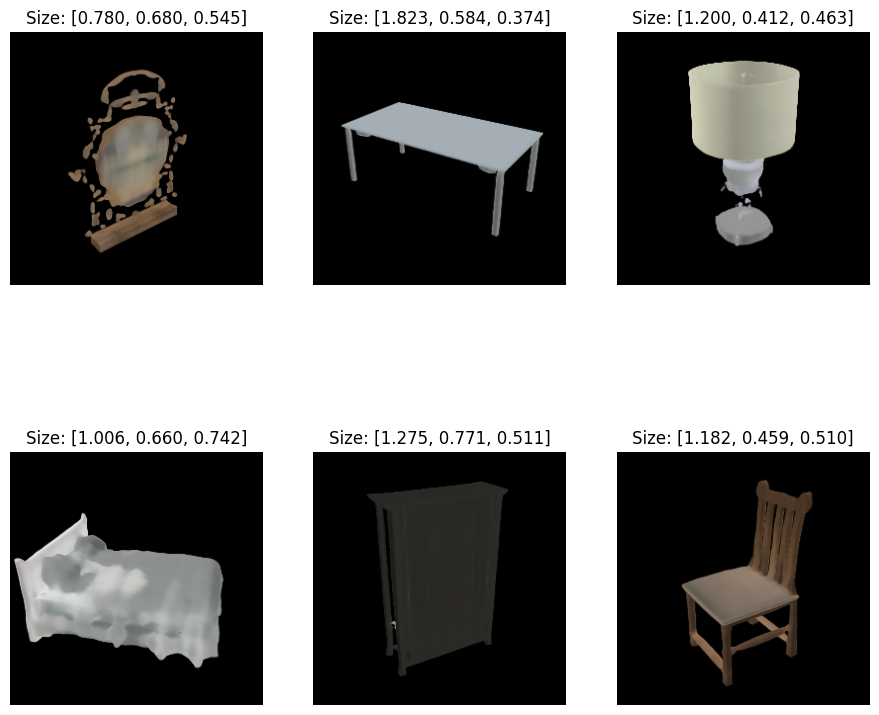

In [23]:
# plt visualization. caption is reversed size, images are rendered images.
import matplotlib.pyplot as plt
from matplotlib import gridspec

imgs_list = [
    '/home/chaewon215/chbf/PatternSVG/temp/AI-System-Project/furniture_images/furniture_0_2.png',
    '/home/chaewon215/chbf/PatternSVG/temp/AI-System-Project/furniture_images/furniture_1_3.png',
    '/home/chaewon215/chbf/PatternSVG/temp/AI-System-Project/furniture_images/furniture_3_4.png',
    '/home/chaewon215/chbf/PatternSVG/temp/AI-System-Project/furniture_images/furniture_4_4.png',
    '/home/chaewon215/chbf/PatternSVG/temp/AI-System-Project/furniture_images/furniture_5_11.png',
    '/home/chaewon215/chbf/PatternSVG/temp/AI-System-Project/furniture_images/furniture_6_16.png'
]

fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2, 4, width_ratios=[1, 1, 1, 1], height_ratios=[1, 1])
for i, img in enumerate(imgs_list):
    ax = fig.add_subplot(gs[i // 3, i % 3])
    img = plt.imread(img)
    furniture_size = reversed_sizes[i][0]
    ax.imshow(img)  # Show the first image in the sequenc력
    # 3자리까지만 출력
    ax.set_title(f"Size: [{furniture_size[0]:.3f}, {furniture_size[1]:.3f}, {furniture_size[2]:.3f}]")
    ax.axis('off')